<a href="https://colab.research.google.com/github/ArunRoshan143/EDA-intern/blob/main/EDA_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To perform EDA using libraries like pandas, numpy,and matplotlib or seaborn. Explore the data's characteristics, distributions, correlations,and outliers. Visualize your findings with histograms, scatter plots, and heatmaps to
# gain insights into the data.

In [1]:
import pandas as pd                #Used for data manipulation and analysis.
import matplotlib.pyplot as plt    #A plotting library used for creating static, animated, and interactive visualizations.
import seaborn as sns              #A Python data visualization library based on matplotlib(advanced).


In [3]:
from google.colab import files
uploaded = files.upload()     #opens a dialog box , contents r stored in dict

Saving IPL_BallByBall2008_2024(Updated).csv to IPL_BallByBall2008_2024(Updated).csv


In [4]:
file_name = 'IPL_BallByBall2008_2024(Updated).csv'
ipl_data = pd.read_csv(file_name)


<ipython-input-4-94e8d78fe612>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ipl_data = pd.read_csv(file_name)


In [5]:
ipl_data['Date'] = pd.to_datetime(ipl_data['Date'], errors='coerce')  # the values in the data are ## so convert it into datetime format

In [7]:
print(ipl_data['Date'])

0        2008-04-18
1        2008-04-18
2        2008-04-18
3        2008-04-18
4        2008-04-18
            ...    
255754   2024-05-01
255755   2024-05-01
255756   2024-05-01
255757   2024-05-01
255758   2024-05-01
Name: Date, Length: 255759, dtype: datetime64[ns]


In [8]:
ipl_data['Ball No'] = ipl_data['Ball No'].astype('int', errors='ignore')  # change the values into integer in 'ball no'


In [9]:
ipl_data['Ball No']

0          0
1          0
2          0
3          0
4          0
          ..
255754    17
255755    17
255756    17
255757    17
255758    17
Name: Ball No, Length: 255759, dtype: int64

In [10]:
ipl_data['type of extras'].fillna('none', inplace=True)
ipl_data['wicket_type'].fillna('no wicket', inplace=True)
ipl_data['Player Out'].fillna('no wicket', inplace=True)
ipl_data['fielders_involved'].fillna('none', inplace=True)

In [11]:
sns.set(style='whitegrid')

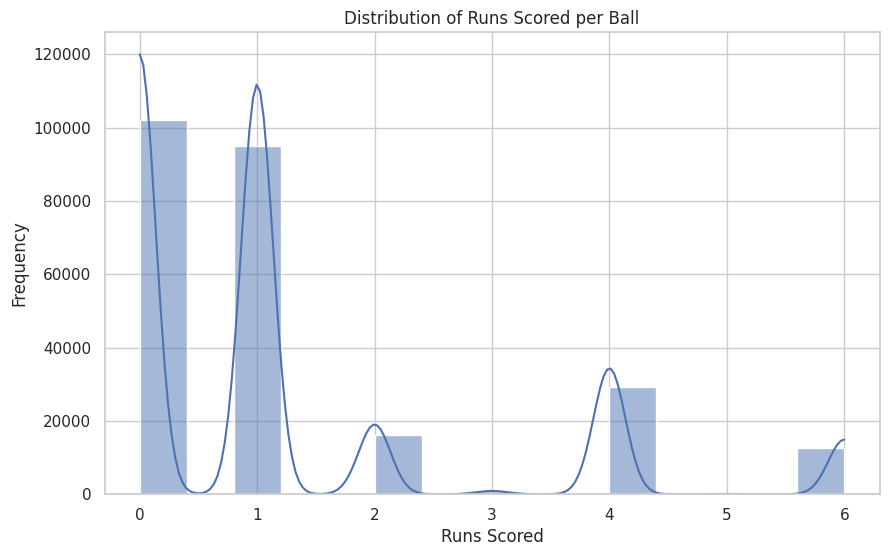

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(ipl_data['runs_scored'], bins=15, kde=True)
plt.title('Distribution of Runs Scored per Ball')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

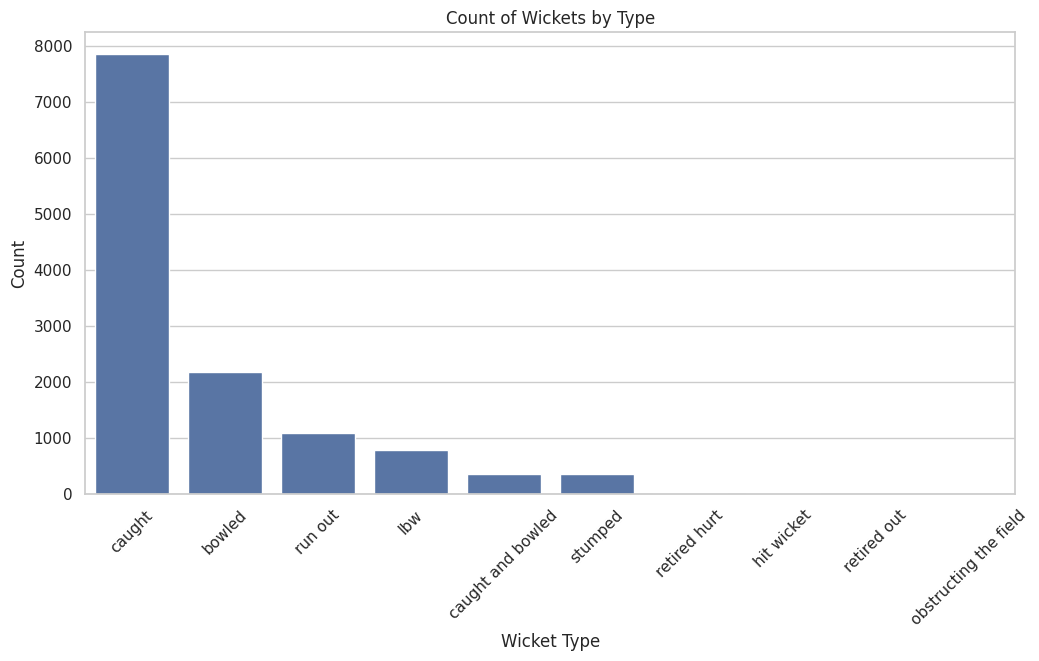

In [13]:
plt.figure(figsize=(12, 6))
wicket_counts = ipl_data['wicket_type'].value_counts().drop('no wicket')
sns.barplot(x=wicket_counts.index, y=wicket_counts.values)
plt.title('Count of Wickets by Type')
plt.xlabel('Wicket Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

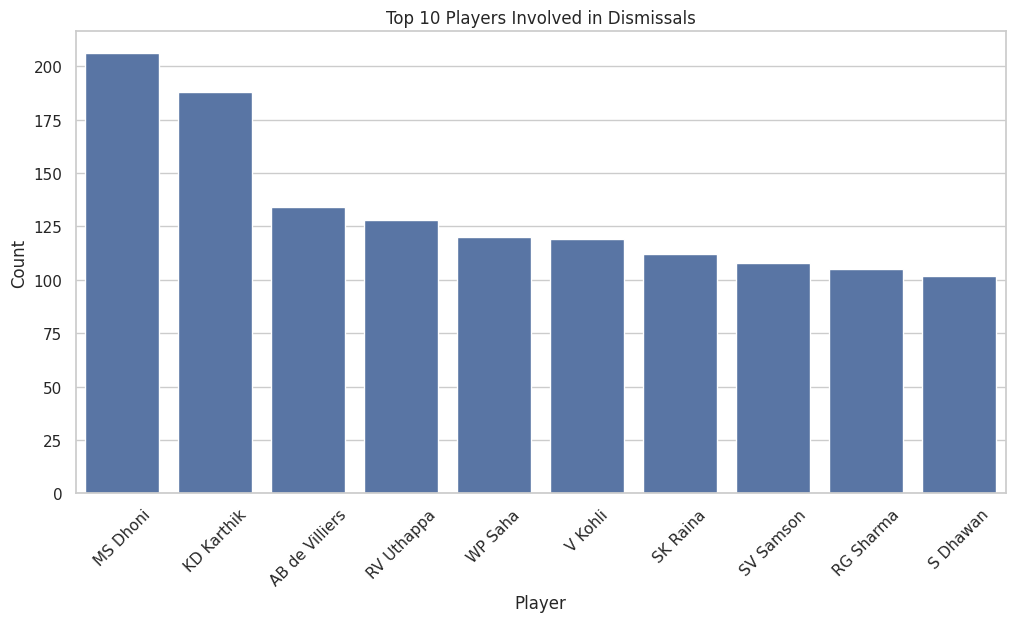

In [14]:
plt.figure(figsize=(12, 6))
top_fielders = ipl_data['fielders_involved'].value_counts().drop('none').head(10)
sns.barplot(x=top_fielders.index, y=top_fielders.values)
plt.title('Top 10 Players Involved in Dismissals')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

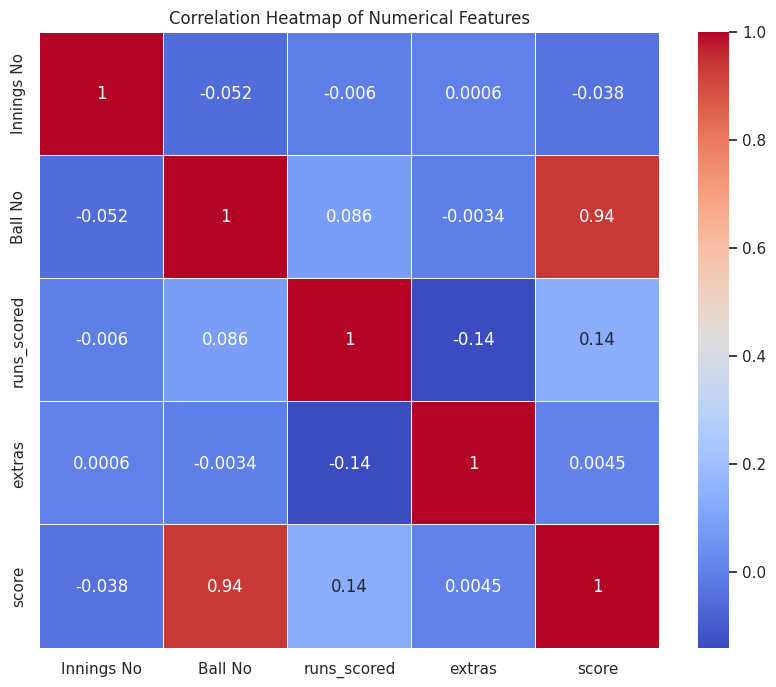

In [ ]:
plt.figure(figsize=(10, 8))
numerical_features = ipl_data[['Innings No', 'Ball No', 'runs_scored', 'extras', 'score']]
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()